#TASK 1.1

Training a model for NLP (LinearSVC)

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns

In [5]:
#Allocating the data training
train_df = pd.read_csv("/content/drive/MyDrive/TweetsData.csv")
train_df

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
...,...,...,...,...,...
785809,1050705141207367680,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,:)
785810,1050706655049109504,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,Positivo,:)
785811,1050705846907392005,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,:)
785812,1050705490232127489,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,:)


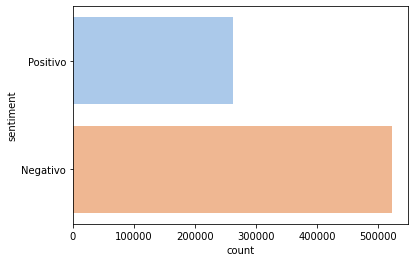

In [6]:
#Showing the data of target class
sns.countplot(y="sentiment", data=train_df, palette="pastel")

Setting the pipe line, LabelEnconder and training the model (LinearSVC)

In [7]:
le = LabelEncoder()
Y = le.fit_transform(train_df['sentiment'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_df['tweet_text'], Y, test_size=0.2, random_state=5)

In [9]:
pipeline = Pipeline([
                     ('vectorizer', TfidfVectorizer()),
                     ('clf', LinearSVC())
])

In [ ]:
pipeline.fit(X_train, y_train)

Accuracy Score and information about the success of algorithm

In [11]:
pred = pipeline.predict(X_test)

In [12]:
accuracy_score(y_test, pred)

0.8081609539140892

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86    104294
           1       0.74      0.67      0.70     52869

    accuracy                           0.81    157163
   macro avg       0.79      0.77      0.78    157163
weighted avg       0.80      0.81      0.81    157163



In [14]:
le.classes_

array(['Negativo', 'Positivo'], dtype=object)

# TASK 2
  WebScraping from twitter

In [ ]:
!pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Importing the twint library, it's a great scraper for data on twitter

In [3]:
import twint
import nest_asyncio
nest_asyncio.apply()

In [15]:
#Search setup and tweet limit
searched = input()
limitOfTweets = input()

flow podcast
1000


In [ ]:
#Configuration of query
query = twint.Config()
query.Search = searched
query.Store_csv = True
query.Limit = limitOfTweets
query.Output = "output.csv"
#Run the search
twint.run.Search(query)

In [17]:
#Allocating the result of query in a variable
tweets = pd.read_csv('output.csv')
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445571348365930501,1445571348365930501,2021-10-06 02:07:21 UTC,2021-10-06,02:07:21,0,706332919997009920,koeplayboy,ؘ,NaN,eu vou fazer o favor de parar de assistir o po...,pt,[],[],[],0,0,0,[],[],https://twitter.com/koeplayboy/status/14455713...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1445570837013090307,1445570837013090307,2021-10-06 02:05:19 UTC,2021-10-06,02:05:19,0,9053032,marcosradiobase,Medidor de audiência,NaN,35.739 assistindo agora Transmissão iniciada h...,pt,"[{'screen_name': 'rafinhabastos', 'name': 'raf...",['https://youtu.be/55hodXHWzOA'],['https://pbs.twimg.com/media/FA-yYO1VcAUnHL7....,0,0,0,['flowpodcast'],[],https://twitter.com/marcosradiobase/status/144...,False,NaN,1,https://pbs.twimg.com/media/FA-yYO1VcAUnHL7.png,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1445570276838678528,1445570276838678528,2021-10-06 02:03:06 UTC,2021-10-06,02:03:06,0,1160809154459635712,natacitouofc,malandro,NaN,o flow podcast (leia-se monark) só é famoso pq...,pt,[],[],[],4,0,2,[],[],https://twitter.com/natacitouofc/status/144557...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1445569531561189380,1445569531561189380,2021-10-06 02:00:08 UTC,2021-10-06,02:00:08,0,1083899632508461056,clayscassius,scriptguy,NaN,Queria tá com ela assistindo o flow podcast e ...,pt,[],[],[],0,0,0,[],[],https://twitter.com/ClaysCassius/status/144556...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1445569125128966156,1445569125128966156,2021-10-06 01:58:31 UTC,2021-10-06,01:58:31,0,1334687395682332672,flowlifepodcas1,Flow Life Podcast,NaN,It was such an honor having you on! Ayee and i...,en,[],[],[],0,0,0,[],[],https://twitter.com/FlowLifePodcas1/status/144...,False,https://twitter.com/wordsinwebb/status/1445473...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,1444359940748062723,1444342498596311042,2021-10-02 17:53:39 UTC,2021-10-02,17:53:39,0,909976120270950401,chefdizzyd,Chef Dizzy,NaN,@4ThangsPodcast I see you bro! And would love ...,en,[],[],[],0,0,0,[],[],https://twitter.com/ChefDizzyD/status/14443599...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '4ThangsPodcast', 'name': 'GM...",NaN,NaN,NaN,NaN
9821,1444358081257803779,1444358081257803779,2021-10-02 17:46:16 UTC,2021-10-02,17:46:16,0,1311080818576625664,tiagocesar1404,Tiago,NaN,Uma verdadeira aula de História com MARCO ANTO...,pt,"[{'screen_name': 'flowpdc', 'name': 'flow podc...",['https://youtu.be/hqvIULUjJ4o'],[],0,0,0,[],[],https://twitter.com/tiagocesar1404/status/1444...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9822,1444354023923060743,1444354023923060743,2021-10-02 17:30:08 UTC,2021-10-02,17:30:08,0,1020057749026230272,lille_fay,TwistedMind,NaN,Ich liebe es einfach mit viel Zeit und Ruhe zu...,de,[],[],[],0,0,7,[],[],https://twitter.com/lille_fay/status/144435402...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9823,1444346474700152833,1444346474700152833,2021-10-02 17:00:08 UTC,2021-10-02,17:00:08,0,1117066023453319169,deeppurplepod,Deep Purple Podcast,NaN,On this day in 2020 The Dead Daisies released ...,en,"[{'screen_name': 'glenn_hughes', 'name': 'glen...",['https://www.youtube.com/watch?v=kbitvxkEBIA'],[],0,3,11,[],[],https://twitter.com/DeepPurplePod/status/14443...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [18]:
#Counting the negative and positive items
countNegative = 0
countPositive = 0

for i, row in tweets.iterrows():
  text = row['tweet']
  prediction = pipeline.predict([text])
  if prediction == 0:
    countNegative =  countNegative + 1
  else:
    countPositive = countPositive + 1
print(countNegative, "negative tweets and", countPositive, "positive tweets.")

2894 negative tweets and 6931 positive tweets.


# TASK 3

Building a wordcloud

In [1]:
!pip install wordcloud

Importing the wordcloud library and matplot

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
#Selecting the content of tweets
wordcloud_data = tweets['tweet']

In [21]:
#Separating items of the list
wordcloud_data = " ".join(s for s in tweets['tweet'])

In [22]:
wordcloud_data

'eu vou fazer o favor de parar de assistir o podcast do flow. esse ancap encubado do monark fala cada absurdo que chega a dar medo. Infelizmente esse programa ao longo do tempo foi se perdendo e virando essa merda ai que é hoje. 35.739 assistindo agora Transmissão iniciada há 2 horas Cauê Moura + @rafinhabastos  - #flowpodcast  #477  https://t.co/qphpa5bmsK  https://t.co/ifbL3Nd0Qz o flow podcast (leia-se monark) só é famoso pq a esquerda e quem é contra ele resolveu dar atenção pras merdas que ele fala Queria tá com ela assistindo o flow podcast e rindo do monark pois burrão It was such an honor having you on! Ayee and it was your first one .. you did amazing!! 🎉 o FlowPodcast é o maior desserviço que a internet brasileira já criou. Só dá palanque pra galera ridiculamente idiota, só o povinho anticiência, charlatões e personalidades sem personalidade. O que esperar de um podcast composto por Monark? @RBellaMartinez @Claudio_Pires @joaoamoedonovo Eu escutei 4 horas e meia do Ciro no fl

Generating a wordcloud with data scrapped from twitter

In [23]:
#Selecting stopwords
stopwords = set(STOPWORDS)
stopwords.update(["https", "da", "meu", "em", "os", "ao", "mas", "pra", "no", "foi", "para", "se", searched]) 

In [24]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(wordcloud_data)

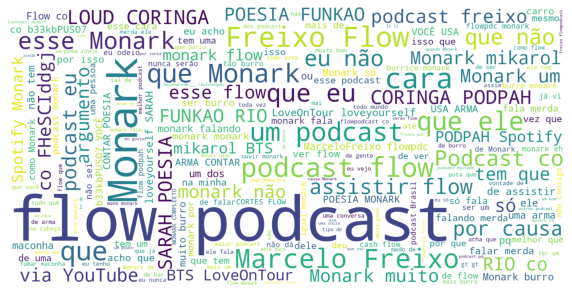

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")